In [1]:
from sklearn import datasets
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

kickstarter_df = pd.read_csv("ks-projects-201801.csv")

kickstarter_df.sort_values(by=['launched'], inplace=True)

kickstarter_df['deadline'] = kickstarter_df['deadline'].apply(
    lambda d: datetime.strptime(d, '%Y-%m-%d'))
kickstarter_df['launched'] = kickstarter_df['launched'].apply(
    lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

In [2]:
kickstarter_df['state'].unique()

array(['canceled', 'suspended', 'failed', 'successful', 'undefined',
       'live'], dtype=object)

In [3]:
kickstarter_df = kickstarter_df[
    (kickstarter_df['state'] != 'live') 
    & (kickstarter_df['state'] != 'undefined')
    & (kickstarter_df['state'] != 'canceled')
    & (kickstarter_df['state'] != 'suspended')]

In [4]:
kickstarter_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.0,625.0,1000.0
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.0
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.0,35.0,20.0
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,145.0,successful,25,US,145.0,145.0,99.0
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,387.0,failed,10,US,387.0,387.0,1900.0


In [5]:
col_target = ['state', 'backers', 'pledged', 'usd pledged', 'usd_pledged_real']
targets_df = kickstarter_df[col_target]
label_df = targets_df[['state']]

label_df.head()

,state
169268,failed
322000,failed
138572,successful
325391,successful
122662,failed


In [6]:
col_features = kickstarter_df.columns.tolist()
col_features = [c for c in col_features if c not in col_target]

features_df = kickstarter_df[col_features]
features_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,US,1000.0
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,US,80000.0
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,US,20.0
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,US,99.0
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,US,1900.0


## Separando dados de teste e treinamento

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_df, label_df, test_size=0.3, shuffle=False)

In [8]:
X_train.head()

,ID,name,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,US,1000.0
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,US,80000.0
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,US,20.0
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,US,99.0
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,US,1900.0


In [9]:
y_train.head()

,state
169268,failed
322000,failed
138572,successful
325391,successful
122662,failed


## Preprocessando os dados

### Manipulando datas

In [10]:
date_cols = ['deadline', 'launched']

In [11]:
X_train['project_duration'] = X_train['deadline'] - X_train['launched']
X_train['project_duration'] = X_train['project_duration'].apply(lambda d: d.days)

In [12]:
X_train['launched_month'] = X_train['launched'].apply(lambda d: d.month)
X_train['launched_year'] = X_train['launched'].apply(lambda d: d.year)
X_train['deadline_month'] = X_train['deadline'].apply(lambda d: d.month)
X_train['deadline_year'] = X_train['deadline'].apply(lambda d: d.year)

In [13]:
X_train.drop(columns=date_cols, inplace=True)

In [14]:
X_train.head()

,ID,name,category,main_category,currency,goal,country,usd_goal_real,project_duration,launched_month,launched_year,deadline_month,deadline_year
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,1000.0,US,1000.0,39,4,2009,5,2009
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,80000.0,US,80000.0,87,4,2009,7,2009
138572,1703704063,drawing for dollars,Illustration,Art,USD,20.0,US,20.0,8,4,2009,5,2009
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,99.0,US,99.0,79,4,2009,7,2009
122662,1622952265,Pantshirts,Fashion,Fashion,USD,1900.0,US,1900.0,28,4,2009,5,2009


### Manipulando dados categoricos

In [15]:
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()
obj_cols

['name', 'category', 'main_category', 'currency', 'country']

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
enc.fit(X_train[obj_cols[1:]])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [18]:
X_ = enc.transform(X_train[obj_cols[1:]])

In [19]:
X_df = pd.DataFrame(X_, columns=enc.get_feature_names_out())
X_df.index = X_train.index

In [20]:
X_train = pd.concat([X_train, X_df], axis=1)

In [21]:
X_train.drop(columns=obj_cols, inplace=True)

In [22]:
X_train.head()

,ID,goal,usd_goal_real,project_duration,launched_month,launched_year,deadline_month,deadline_year,category_3D Printing,category_Academic,...,country_GB,country_IE,country_IT,country_LU,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_US
169268,1860890148,1000.0,1000.0,39,4,2009,5,2009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
322000,709707365,80000.0,80000.0,87,4,2009,7,2009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
138572,1703704063,20.0,20.0,8,4,2009,5,2009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
325391,727286,99.0,99.0,79,4,2009,7,2009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
122662,1622952265,1900.0,1900.0,28,4,2009,5,2009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Manipulando dados numéricos

In [23]:
X_train.select_dtypes(exclude=['float', 'int']).shape

(232172, 0)

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [25]:
ss.fit(X_train)

StandardScaler()

In [26]:
X_ = ss.transform(X_train)

### Processando o label

In [27]:
y_train[y_train['state'] == 'failed'] = 0
y_train[y_train['state'] == 'successful'] = 1

In [28]:
y_train = y_train['state'].tolist()

### Balanceamento do dataset

In [30]:
sum(y_train) / len(y_train)

0.4074048550212773

In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

In [32]:
X_, y_train = sm.fit_resample(X_, y_train)

In [33]:
sum(y_train) / len(y_train)

0.5

## Treinamento do modelo

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Train the model using the training sets
knn.fit(X_, y_train)

KNeighborsClassifier(n_jobs=-1)

In [204]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=15)
rf.fit(X_, y_train)

RandomForestClassifier(max_depth=15, n_estimators=30)

## Testando o modelo

### Processando os dados de teste

In [35]:
X_test['project_duration'] = X_test['deadline'] - X_test['launched']
X_test['project_duration'] = X_test['project_duration'].apply(lambda d: d.days)
X_test['launched_month'] = X_test['launched'].apply(lambda d: d.month)
X_test['launched_year'] = X_test['launched'].apply(lambda d: d.year)
X_test['deadline_month'] = X_test['deadline'].apply(lambda d: d.month)
X_test['deadline_year'] = X_test['deadline'].apply(lambda d: d.year)
X_test.drop(columns=date_cols, inplace=True)

In [36]:
X_values = enc.transform(X_test[obj_cols[1:]])
X_df = pd.DataFrame(X_values, columns=enc.get_feature_names_out())
X_df.index = X_test.index
X_test = pd.concat([X_test, X_df], axis=1)
X_test.drop(columns=obj_cols, inplace=True)

In [37]:
X_test_ = ss.transform(X_test)

In [38]:
y_test[y_test['state'] == 'failed'] = 0
y_test[y_test['state'] == 'successful'] = 1
y_test = y_test['state'].tolist()

### Visualizar resultados

In [205]:
confusion_matrix(
    rf.predict(X_test_), 
    y_test, normalize='true')

array([[0.68053744, 0.31946256],
       [0.3486845 , 0.6513155 ]])

In [206]:
y_proba = rf.predict_proba(X_test_)

In [207]:
y_pred = [1 if y[1] > 0.55 else 0 for y in y_proba]
# y_pred = [1 if y else 0 for y in y_proba]

In [208]:
error = [abs(y_1 - y_2) for y_1, y_2 in zip(y_pred, y_test)]
sum(error) / len(y_pred)

0.3337286312975488

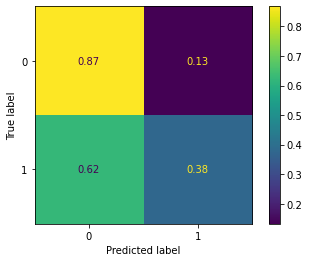

In [209]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_, y_test, normalize='true')

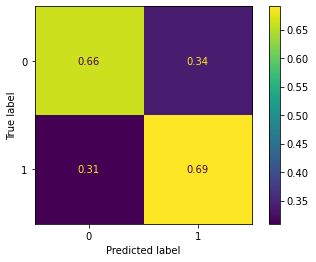

In [210]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize='true')

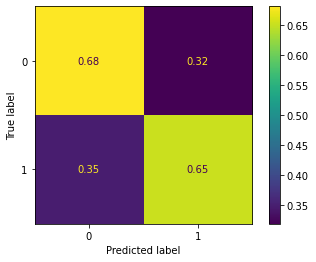

In [211]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(rf.predict(X_test_), y_test, normalize='true')

C:\Users\eduhs\anaconda3\envs\projeto\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


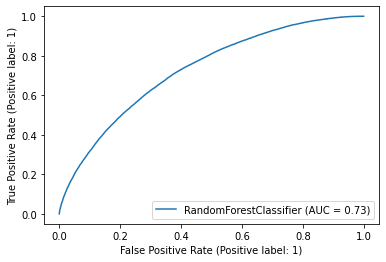

In [82]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test_, y_test)

In [40]:
y_pred = rf.predict(X_test_)

In [41]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6679798599037216


## Otimizando parametros

In [202]:
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix

max_depth = [5, 10, 15, 20, 30, 50, 70, 80, 90, 100, 150]

cm_list = []
cm_1, cm_2 = [], []
for m in tqdm(max_depth):
    rf_ = RandomForestClassifier(
        n_estimators=30,
        max_depth=m)
    rf_.fit(X_, y_train)
    
    cm = confusion_matrix(
        rf_.predict(X_test_), 
        y_test, normalize='true')
    
    cm_list.append(cm)
    cm_1.append(cm[0,0])
    cm_2.append(cm[1,1])

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [03:16<00:00, 17.82s/it]


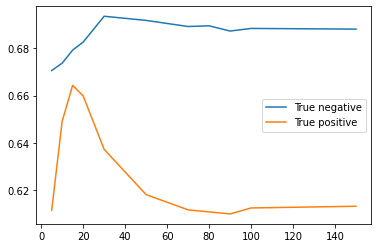

In [203]:
import matplotlib.pyplot as plt

plt.plot(max_depth, cm_1, label='True negative')
plt.plot(max_depth, cm_2, label='True positive')
plt.legend(['True negative', 'True positive'])
plt.show()

## Testando valores

In [159]:
features_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,US,1000.0
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,US,80000.0
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,US,20.0
325391,727286,Offline Wikipedia iPhone app,Software,Technology,USD,2009-07-14,99.0,2009-04-25 17:36:21,US,99.0
122662,1622952265,Pantshirts,Fashion,Fashion,USD,2009-05-26,1900.0,2009-04-27 14:10:39,US,1900.0


In [196]:
input_df = pd.DataFrame({
    'ID': 10,
    'name': 'cajscjaposcjpoas',
    'category': 'Software',
    'main_category': 'Technology',
    'currency': 'USD',
    'deadline': datetime(2015, 12, 10),
    'goal': 100.0,
    'launched': datetime(2015, 10, 10),
    'country': 'US',
    'usd_goal_real': 100.0
}, index = [0])

In [197]:
input_df

,ID,name,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
0,10,cajscjaposcjpoas,Software,Technology,USD,2015-12-10,100.0,2015-10-10,US,100.0


### Preprocessando os dados

In [198]:
input_df['project_duration'] = input_df['deadline'] - input_df['launched']
input_df['project_duration'] = input_df['project_duration'].apply(lambda d: d.days)
input_df['launched_month'] = input_df['launched'].apply(lambda d: d.month)
input_df['launched_year'] = input_df['launched'].apply(lambda d: d.year)
input_df['deadline_month'] = input_df['deadline'].apply(lambda d: d.month)
input_df['deadline_year'] = input_df['deadline'].apply(lambda d: d.year)
input_df.drop(columns=date_cols, inplace=True)

In [199]:
X_values = enc.transform(input_df[obj_cols[1:]])
X_df = pd.DataFrame(X_values, columns=enc.get_feature_names_out())
X_df.index = input_df.index
input_df = pd.concat([input_df, X_df], axis=1)
input_df.drop(columns=obj_cols, inplace=True)

In [200]:
input_df_ = ss.transform(input_df)

### Prevendo o resultado

In [201]:
rf.predict_proba(input_df_)

array([[0.32920521, 0.67079479]])

## FLAML

In [42]:
!pip install flaml[notebook]

  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=5450302880da23d34399a7e92a49c24622eb3c4d69c653b0c264066c4a1af2dc
  Stored in directory: c:\users\eduhs\appdata\local\pip\cache\wheels\9c\9e\f3\6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=7aeebae223b5ff3b309ad21d255b4f15033dab46e773a25b0babd7c3ba462ec3
  Stored in directory: c:\users\eduhs\appdata\local\pip\cache\wheels\1f\0f\15\332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built openml liac-arff


In [43]:
X_train_fl, input_df_fl, y_train_fl, y_test_fl = train_test_split(
    features_df, label_df, test_size=0.3, shuffle=False)

In [55]:
from flaml import AutoML

automl = AutoML()

automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
}

automl.fit(
    X_train_fl, 
    y_train_fl['state'], 
    **automl_settings)

[flaml.automl: 12-11 23:52:06] {1943} INFO - task = classification
[flaml.automl: 12-11 23:52:06] {1945} INFO - Data split method: stratified
[flaml.automl: 12-11 23:52:06] {1949} INFO - Evaluation method: holdout
[flaml.automl: 12-11 23:52:07] {2019} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 12-11 23:52:07] {2071} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 12-11 23:52:07] {2311} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-11 23:52:07] {2425} INFO - Estimated sufficient time budget=115112s. Estimated necessary time budget=2826s.
[flaml.automl: 12-11 23:52:07] {2505} INFO -  at 3.7s,	estimator lgbm's best error=0.4074,	best estimator lgbm's best error=0.4074
[flaml.automl: 12-11 23:52:07] {2311} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-11 23:52:08] {2505} INFO -  at 4.0s,	estimator lgbm's best error=0.4074,	best estimator lgbm's best error=0.4074
[

In [56]:
# Print the best model
print(automl.model.estimator)

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.8833142421826156, colsample_bynode=1,
              colsample_bytree=0.889199994013064, gamma=0, gpu_id=-1,
              grow_policy='lossguide', importance_type='gain',
              interaction_constraints='', learning_rate=0.27512473336878895,
              max_delta_step=0, max_depth=0, max_leaves=128,
              min_child_weight=2.861882880562183, missing=nan,
              monotone_constraints='()', n_estimators=14, n_jobs=-1,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0.017437454520793372, reg_lambda=0.4192537216664826,
              scale_pos_weight=1, subsample=0.7830434610103468,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, verbosity=0)


In [57]:
best_model = automl.model.estimator

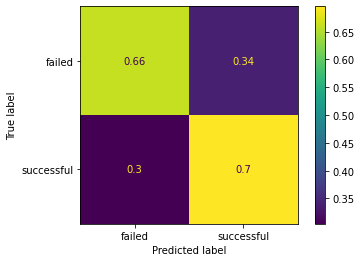

In [91]:
ConfusionMatrixDisplay.from_predictions(automl.predict(X_test_fl), y_test_fl['state'], normalize='true')